# 1.数据集介绍
Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

# 2.数据预处理

## 2.1 导入第三方库

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
dataset = pd.read_csv('datasets/Iris.csv')

可视化数据分布

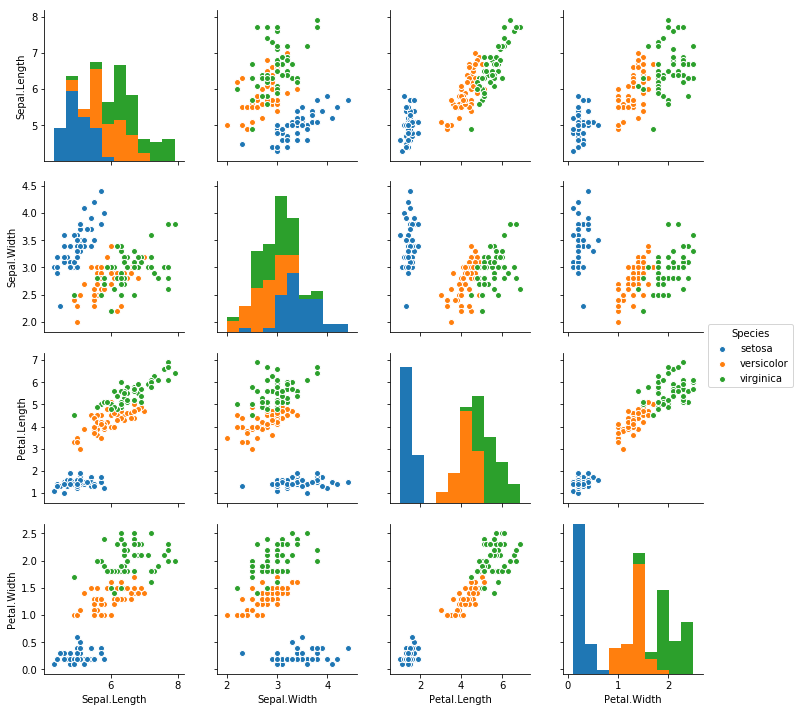

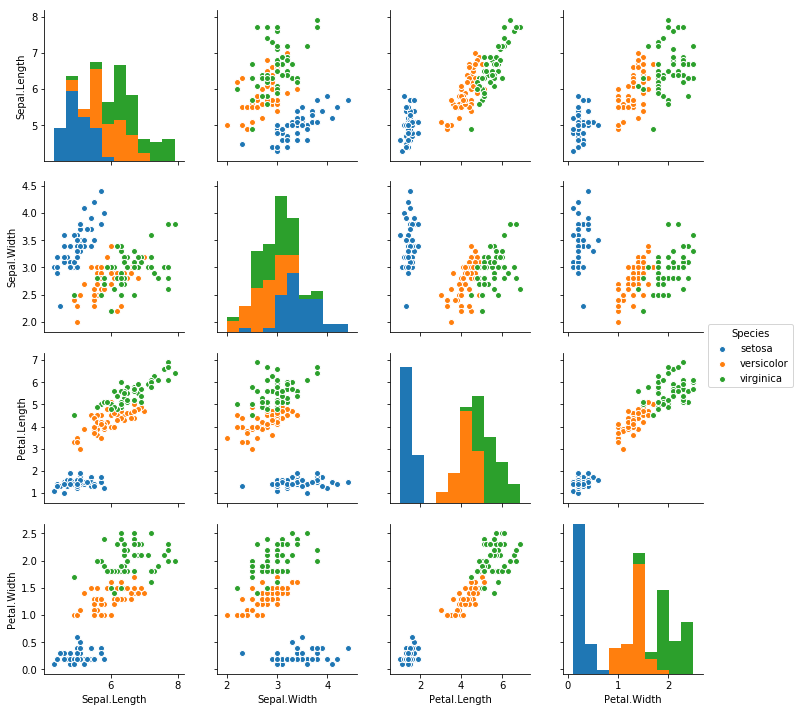

In [13]:
sns.pairplot(dataset.iloc[:, 1:6], hue='Species')
plt.show()

## 2.2 切分数据

In [6]:
X = dataset.iloc[:, 1:5].values
y = dataset.iloc[:,5].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

## 2.3 利用交叉验证，生成训练集和测试集

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  #交叉验证，每次取百分之20的数据作为测试集

# 3. 搭建模型
一层输入层，两层隐藏层，一层输出层

In [8]:
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))     #输入层
model.add(Dense(8, activation='relu'))                        #隐藏层1
model.add(Dense(6, activation='relu'))                        #隐藏层2
model.add(Dense(3, activation='softmax'))                     #输出层

## 3.1 编译模型
优化器：AdamOptimizer
loss：categorical_crossentropy   交叉熵函数

In [9]:
model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])    #编译模型
model.summary()                                                                   #模型结构可视化

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


## 3.2 训练模型

In [10]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
120/120 [==============================] - 1s 5ms/step - loss: 0.9371 - acc: 0.5500
Epoch 2/100
120/120 [==============================] - 0s 133us/step - loss: 0.5779 - acc: 0.6917
Epoch 3/100
120/120 [==============================] - 0s 133us/step - loss: 0.4326 - acc: 0.6917
Epoch 4/100
120/120 [==============================] - 0s 141us/step - loss: 0.3247 - acc: 0.9500
Epoch 5/100
120/120 [==============================] - 0s 125us/step - loss: 0.2046 - acc: 0.9667
Epoch 6/100
120/120 [==============================] - 0s 108us/step - loss: 0.2186 - acc: 0.9167
Epoch 7/100
120/120 [==============================] - 0s 108us/step - loss: 0.3006 - acc: 0.8667
Epoch 8/100
120/120 [==============================] - 0s 108us/step - loss: 0.1664 - acc: 0.9333
Epoch 9/100
120/120 [==============================] - 0s 125us/step - loss: 0.1514 - acc: 0.9333
Epoch 10/100
120/120 [==============================] - 0s 108us/step - loss: 0.1442 - acc: 0.9500
Epoch 11/100
120/120 

120/120 [==============================] - 0s 108us/step - loss: 0.0660 - acc: 0.9750
Epoch 84/100
120/120 [==============================] - 0s 100us/step - loss: 0.0582 - acc: 0.9667
Epoch 85/100
120/120 [==============================] - 0s 108us/step - loss: 0.0646 - acc: 0.9750
Epoch 86/100
120/120 [==============================] - 0s 100us/step - loss: 0.0803 - acc: 0.9750
Epoch 87/100
120/120 [==============================] - 0s 108us/step - loss: 0.0731 - acc: 0.9750
Epoch 88/100
120/120 [==============================] - 0s 116us/step - loss: 0.0945 - acc: 0.9667
Epoch 89/100
120/120 [==============================] - 0s 108us/step - loss: 0.0692 - acc: 0.9750
Epoch 90/100
120/120 [==============================] - 0s 108us/step - loss: 0.0968 - acc: 0.9583
Epoch 91/100
120/120 [==============================] - 0s 116us/step - loss: 0.0787 - acc: 0.9667
Epoch 92/100
120/120 [==============================] - 0s 108us/step - loss: 0.0590 - acc: 0.9750
Epoch 93/100
120/120 [=

# 4.评估模型
Precision：准确度  
recall：召回率  
F1-score：$F_1=2*\frac {Precision*recall}{Precision+recall}$

In [11]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

report = classification_report(y_test_class, y_pred_class)
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30

